#User Profiling and Segmentation: Process We Can Follow
##User profiling and segmentation are powerful techniques that enable data professionals to understand their user base in-depth and tailor their strategies to meet diverse user needs. Below is the process we can follow for the task of User Profiling and Segmentation:

##Determine what you aim to achieve with user profiling and segmentation, such as improving customer service, personalized marketing, or product recommendation.
##Collect data from various sources, including user interactions on websites/apps, transaction histories, social media activity, and demographic information.
##Create new features that capture relevant user behaviours and preferences. It may involve aggregating transaction data, calculating the frequency of activities, or extracting patterns from usage logs.
##Select appropriate segmentation techniques.
##For each segment identified, create user profiles that summarize the key characteristics and behaviours of users in that segment.

#Here’s an overview of all the columns in the dataset:

###User ID: Unique identifier for each user.
###Age: Age range of the user.
###Gender: Gender of the user.
###Location: User’s location type (Urban, Suburban, Rural).
###Language: Primary language of the user.
###Education Level: Highest education level achieved.
###Likes and Reactions: Number of likes and reactions a user has made.
###Followed Accounts: Number of accounts a user follows.
###Device Usage: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
###Time Spent Online (hrs/weekday): Average hours spent online on weekdays.
###Time Spent Online (hrs/weekend): Average hours spent online on weekends.
###Click-Through Rates (CTR): The percentage of ad impressions that lead to clicks.
###Conversion Rates: The percentage of clicks that lead to conversions/actions.
###Ad Interaction Time (sec): Average time spent interacting with ads in seconds.
###Income Level: User’s income level.
###Top Interests: Primary interests of the user.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from google.colab import files

In [3]:
uploaded=files.upload()

Saving user_profiles_for_ads.csv to user_profiles_for_ads.csv


In [4]:
df=pd.read_csv("user_profiles_for_ads.csv")

In [5]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


<ipython-input-6-022777f125bc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Age', data=df, palette='Set3')
<ipython-input-6-022777f125bc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], data=df, palette='coolwarm', x='Gender')
<ipython-input-6-022777f125bc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 2], data=df, x='Location', palette='coolwarm')


<Figure size 2500x1800 with 0 Axes>

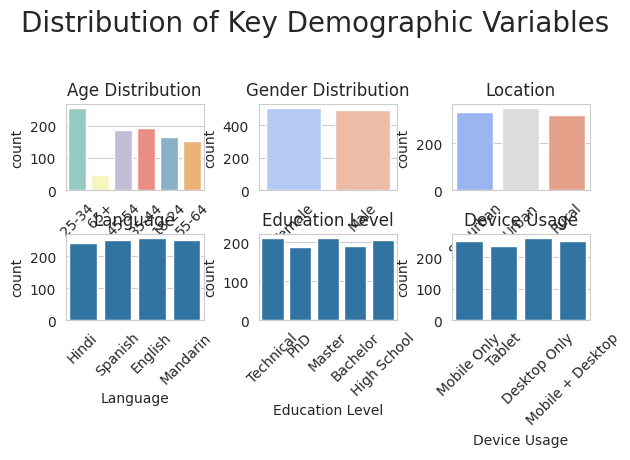

In [6]:
# Setting style and figure size
sns.set_style('whitegrid')
plt.figure(figsize=(25, 18))

# Creating subplots
fig, axes = plt.subplots(3, 3)

# Adding a title to the entire figure
fig.suptitle('Distribution of Key Demographic Variables', fontsize=20)

# Age Distribution
sns.countplot(ax=axes[0, 0], x='Age', data=df, palette='Set3')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender Distribution
sns.countplot(ax=axes[0, 1], data=df, palette='coolwarm', x='Gender')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Location
sns.countplot(ax=axes[0, 2], data=df, x='Location', palette='coolwarm')
axes[0, 2].set_title('Location')
axes[0, 2].tick_params(axis='x', rotation=45)

# Language
sns.countplot(ax=axes[1, 0], data=df, x='Language')
axes[1, 0].set_title('Language')
axes[1, 0].tick_params(axis='x', rotation=45)

# Education Level
sns.countplot(ax=axes[1, 1], data=df, x='Education Level')
axes[1, 1].set_title('Education Level')
axes[1, 1].tick_params(axis='x', rotation=45)

# Device Usage
sns.countplot(ax=axes[1, 2], data=df, x='Device Usage')
axes[1, 2].set_title('Device Usage')
axes[1, 2].tick_params(axis='x', rotation=45)

# Removing empty subplots
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjusting layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the position of the figure title
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjusting the spacing between subplots

plt.show()


We’ll now examine device usage patterns to understand the primary means by which users access the platform. This information is crucial for optimizing ad formats and delivery channels. Additionally, we’ll explore users’ online behaviour, including their engagement with content and ads, and identify the most common interests among users. Let’s proceed with analyzing device usage patterns:

<ipython-input-7-801d4cda286e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device Usage', data=df, palette='coolwarm')


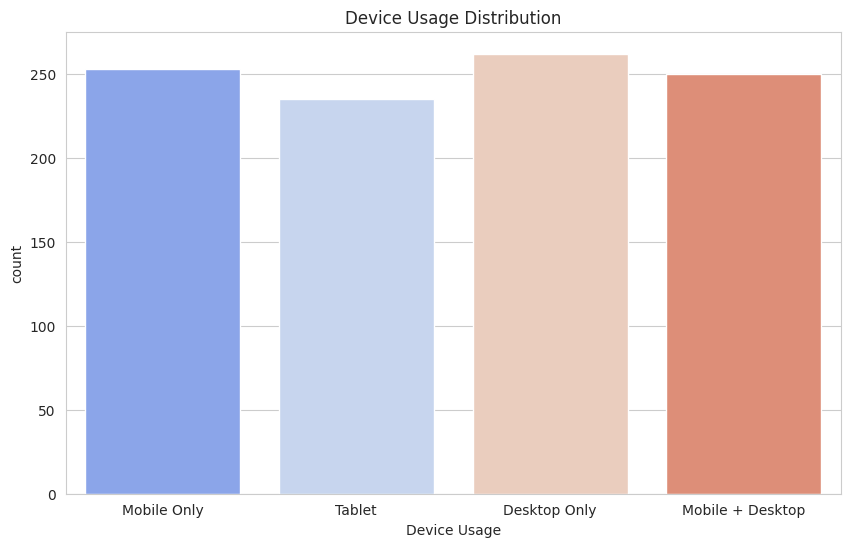

In [7]:
# device usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=df, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

#Analyze the average time users spend online on weekdays versus weekends.
#Investigate user engagement metrics, such as likes and reactions.
#Delve into ad interaction metrics, including Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.

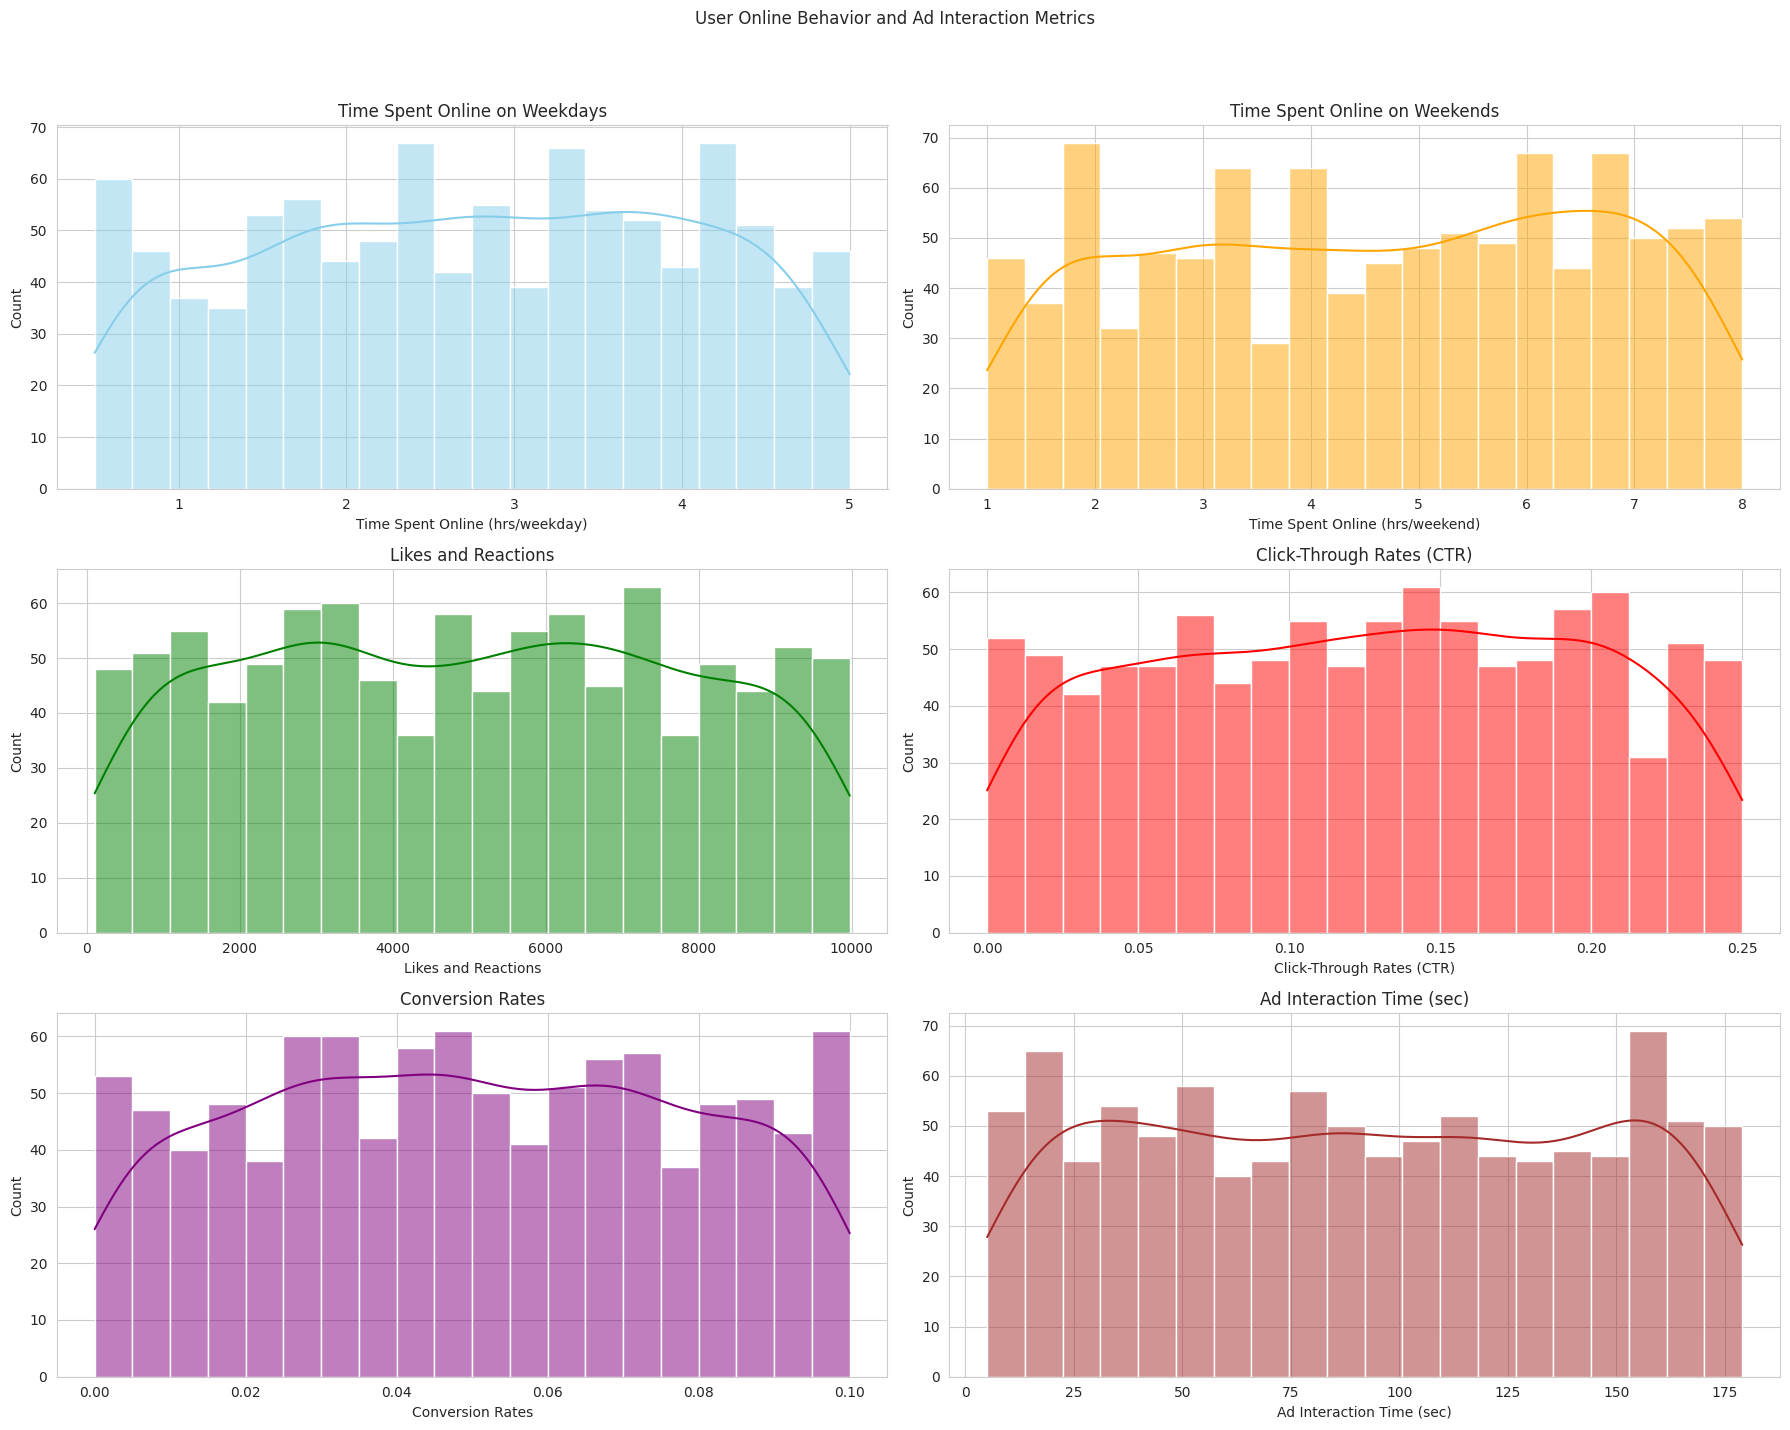

In [8]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=df, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=df, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=df, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=df, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=df, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=df, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now, let’s identify the most common interests among users, which is vital for segmenting the audience and tailoring ad campaigns to match user preferences:

In [14]:
from collections import Counter

user_intrests=df['Top Interests'].str.split(", ").sum()


In [ ]:
user_intrests

In [20]:
intrest_counter=Counter(user_intrests)

In [21]:
intrest_counter

Counter({'Digital Marketing': 182,
         'Data Science': 147,
         'Fitness and Wellness': 167,
         'Gaming': 155,
         'DIY Crafts': 148,
         'Investing and Finance': 171,
         'Gardening': 140,
         'Music Production': 169,
         'Gourmet Cooking': 157,
         'Software Engineering': 151,
         'Eco-Friendly Living': 163,
         'Photography': 148,
         'Travel and Adventure': 152,
         'Fashion Modelling': 161,
         'Reading and Literature': 156,
         'Pet Care': 155})

In [22]:
intrest_df=pd.DataFrame(intrest_counter.items(),columns=["Interests","Frequancy"])

In [23]:
intrest_df

,Interests,Frequancy
0,Digital Marketing,182
1,Data Science,147
2,Fitness and Wellness,167
3,Gaming,155
4,DIY Crafts,148
5,Investing and Finance,171
6,Gardening,140
7,Music Production,169
8,Gourmet Cooking,157
9,Software Engineering,151


from matplotlib import pyplot as plt
intrest_df['Frequancy'].plot(kind='hist', bins=20, title='Frequancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
intrest_df['Frequancy'].plot(kind='line', figsize=(8, 4), title='Frequancy')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-25-b597497fec9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')


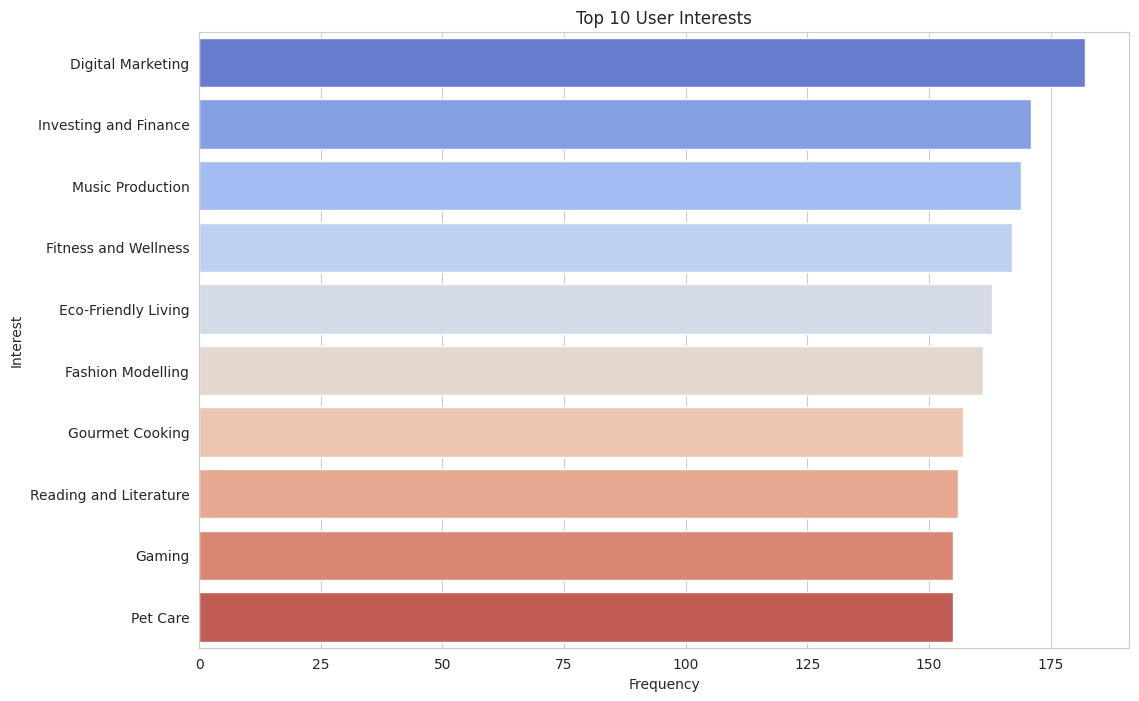

In [25]:
# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

#User Profiling and Segmentation
We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:

##Demographics: Age, Gender, Income Level, Education Level
##Behavioural: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
##Interests: Aligning ad content with the top interests identified
To implement user profiling and segmentation, we can apply clustering techniques or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.

##Let’s start by selecting a subset of features that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments:

#Selecting Meaningful features for clustering

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer


In [27]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [28]:
x=df[['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']]

In [45]:
numerical_features=['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

In [36]:
numeric_transformer=StandardScaler()

In [46]:
categorical_features=['Age', 'Gender', 'Income Level']

In [38]:
categorical_transformer=OneHotEncoder()

In [47]:
# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

In [49]:
pipeline.fit(x)
cluster_labels = pipeline.named_steps['cluster'].labels_
df['Cluster'] = cluster_labels

print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

The clustering process has successfully segmented our users into five distinct groups (Clusters 0 to 4). Each cluster represents a unique combination of the features we selected, including age, gender, income level, online behaviour, and engagement metrics. These clusters can serve as the basis for creating targeted ad campaigns tailored to the preferences and behaviours of each segment.
We’ll compute the mean values of the numerical features and the mode for categorical features within each cluster to get a sense of their defining characteristics:

In [50]:
# computing the mean values of numerical features for each cluster
cluster_means = df.groupby('Cluster')[numerical_features].mean()

for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,1.632955,6.135795,5480.022727,0.173705,25-34,Male,80k-100k
1,2.937500,2.735000,7462.233333,0.152983,25-34,Male,100k+
2,3.364532,6.151724,5997.108374,0.058502,25-34,Male,60k-80k
3,3.872986,4.624171,2409.625592,0.167123,25-34,Female,60k-80k
4,1.558235,3.769412,3034.235294,0.064153,25-34,Female,0-20k


#Now, we’ll assign each cluster a name that reflects its most defining characteristics based on the mean values of numerical features and the most frequent categories for categorical features. Based on the cluster analysis, we can summarize and name the segments as follows:

##Cluster 0 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
##Cluster 1 – “Engaged Professionals”: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
##Cluster 2 – “Low-Key Users”: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
##Cluster 3 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
##Cluster 4 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [51]:
# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting
radar_df_normalized = radar_df_normalized.append(radar_df_normalized.iloc[0])

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

<ipython-input-51-42e3d23d704e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  radar_df_normalized = radar_df_normalized.append(radar_df_normalized.iloc[0])


In [52]:
import plotly.graph_objects as go
fig = go.Figure()

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Adding hover text for each feature
    ))

# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()